# Furniture Sales Forecasting

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import pickle 

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Super_Store_data.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [5]:
# Check Number of Rows & Columns present in the DataFrame df.
df.shape

(2121, 21)

In [6]:
# Check null values present in the DataFrame df.
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# Check for duplicate values.
df.duplicated().sum()

0

In [8]:
# Check basic statistics of numeric columns.
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [9]:
# convert Order Date and Ship date in Date time.
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])

In [10]:
# extract features from Order Date
df['Order_year'] = df['Order Date'].dt.year
df['Order_month'] = df['Order Date'].dt.month
df['Order_day_of_week'] = df['Order Date'].dt.dayofweek

In [11]:
# Extract features from Ship Date
df['Ship_year'] = df['Ship Date'].dt.year
df['Ship_month'] = df['Ship Date'].dt.month
df['Ship_day_of_week'] = df['Ship Date'].dt.dayofweek

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order_year,Order_month,Order_day_of_week,Ship_year,Ship_month,Ship_day_of_week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,11,1,2016,11,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,11,1,2016,11,4
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,10,6,2015,10,6
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,48.8600,7,0.00,14.1694,2014,6,0,2014,6,5
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,1706.1840,9,0.20,85.3092,2014,6,0,2014,6,5


In [13]:
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order_year,Order_month,Order_day_of_week,Ship_year,Ship_month,Ship_day_of_week
Row ID,1.000000,0.017164,0.001696,-0.000246,0.031848,0.008775,0.045423,-0.015801,-0.016460,0.046055,-0.018648,-0.047888
Postal Code,0.017164,1.000000,-0.011786,0.013700,0.106736,-0.026335,-0.016405,0.002659,0.017808,-0.017361,0.002977,-0.008974
Sales,0.001696,-0.011786,1.000000,0.437464,-0.028576,0.173510,-0.047660,0.029083,-0.031395,-0.050081,0.038774,0.046398
Quantity,-0.000246,0.013700,0.437464,1.000000,-0.015695,0.061213,-0.052997,0.011099,-0.013942,-0.053882,0.017607,0.024121
Discount,0.031848,0.106736,-0.028576,-0.015695,1.000000,-0.483769,-0.017077,-0.003088,0.008546,-0.015942,-0.007858,-0.021413
Profit,0.008775,-0.026335,0.173510,0.061213,-0.483769,1.000000,-0.017445,0.029176,-0.008595,-0.015643,0.020768,0.003756
Order_year,0.045423,-0.016405,-0.047660,-0.052997,-0.017077,-0.017445,1.000000,-0.009377,0.041581,0.994089,-0.003445,-0.081367
Order_month,-0.015801,0.002659,0.029083,0.011099,-0.003088,0.029176,-0.009377,1.000000,-0.000072,0.007267,0.913368,0.025649
Order_day_of_week,-0.016460,0.017808,-0.031395,-0.013942,0.008546,-0.008595,0.041581,-0.000072,1.000000,0.041061,-0.001213,-0.118343
Ship_year,0.046055,-0.017361,-0.050081,-0.053882,-0.015942,-0.015643,0.994089,0.007267,0.041061,1.000000,-0.030853,-0.084363


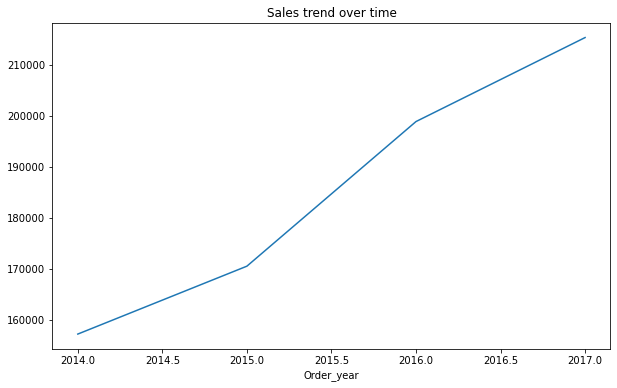

In [14]:
# Sales trend over time (year)
plt.figure(figsize=(10,6))
df.groupby('Order_year')['Sales'].sum().plot()
plt.title('Sales trend over time')
plt.show()

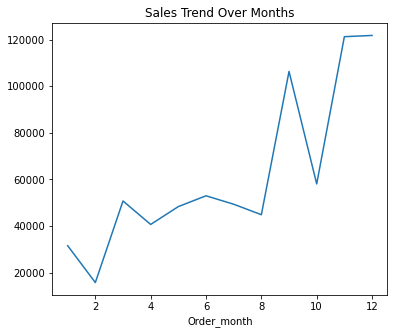

In [72]:
# Generate Sales Trend over months
plt.figure(figsize=(6,5))
df.groupby('Order_month')['Sales'].sum().plot()
plt.title('Sales Trend Over Months')
plt.show()

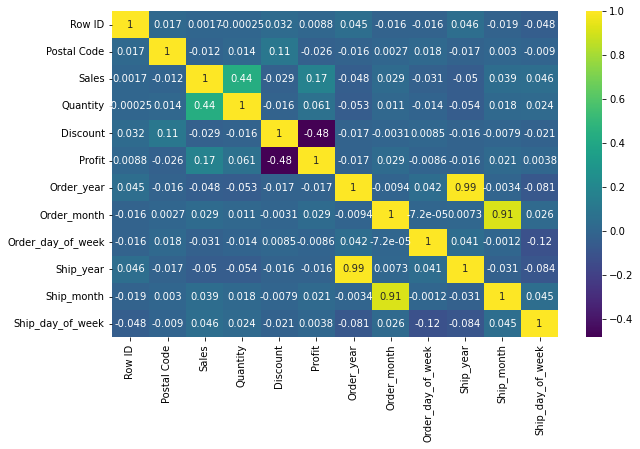

In [16]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

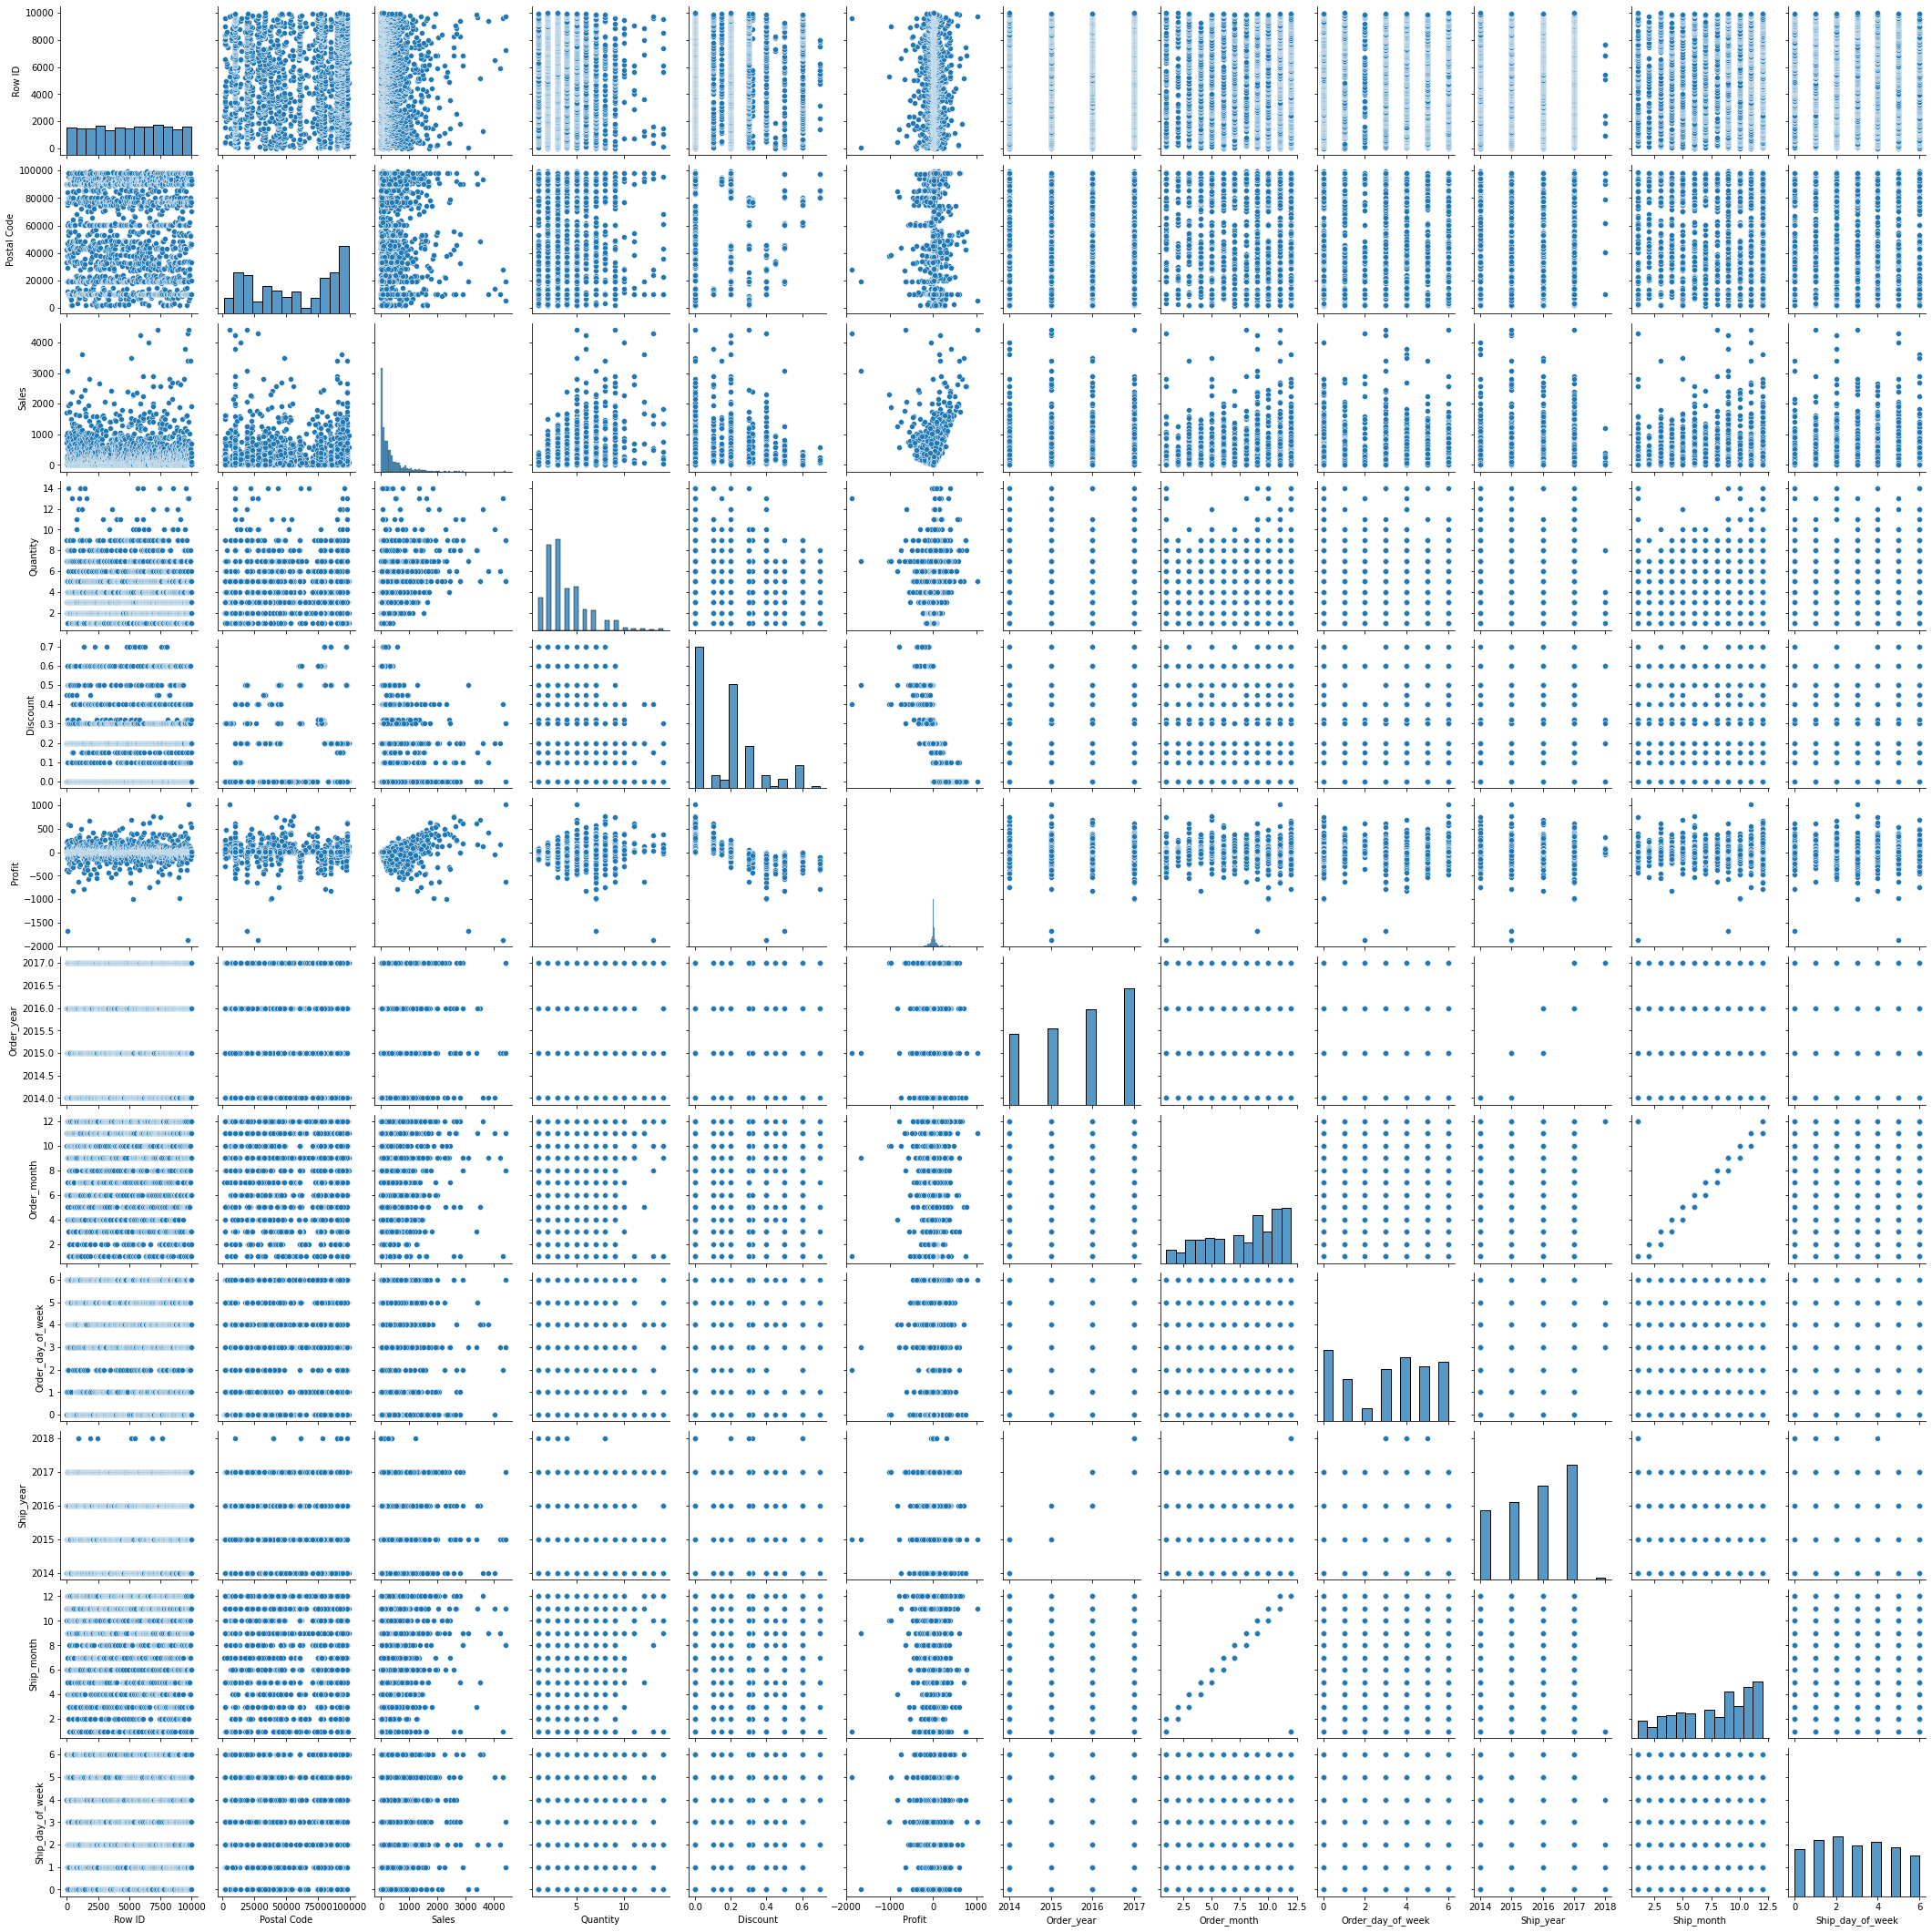

In [17]:
# Generate a Pair Plot.
sns.pairplot(df)

In [18]:
df['Product Name'].value_counts()[:10]

KI Adjustable-Height Table                                     18
Staple-based wall hangings                                     16
Situations Contoured Folding Chairs, 4/Set                     15
Eldon Wave Desk Accessories                                    14
Global Wood Trimmed Manager's Task Chair, Khaki                14
Global High-Back Leather Tilter, Burgundy                      14
SAFCO Arco Folding Chair                                       13
Chromcraft Round Conference Tables                             13
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back    12
Eldon Expressions Wood Desk Accessories, Oak                   12
Name: Product Name, dtype: int64

In [19]:
Segment_count = df['Segment'].value_counts()
Segment_count

Consumer       1113
Corporate       646
Home Office     362
Name: Segment, dtype: int64

In [20]:
Segment_count.index

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object')

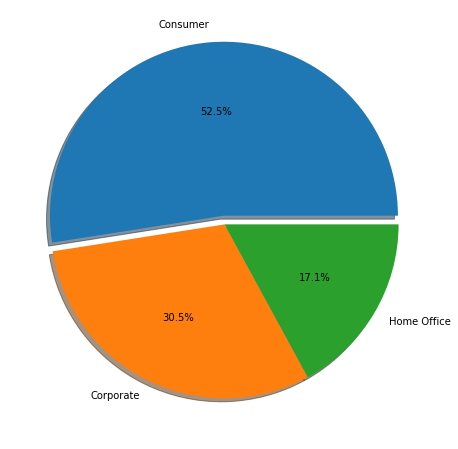

In [21]:
# Plot a Pie Chart for Segment.
plt.figure(figsize=(8,8))
explode = (0.05,0,0)
plt.pie(Segment_count, labels=Segment_count.index, autopct="%0.1f%%", explode= explode, shadow=True)
plt.show()

**' Consumer ' is having the maximum share in sales among all customer segments**

In [22]:
Region_count = df['Region'].value_counts()
Region_count

West       707
East       601
Central    481
South      332
Name: Region, dtype: int64

In [23]:
Region_count.index

Index(['West', 'East', 'Central', 'South'], dtype='object')

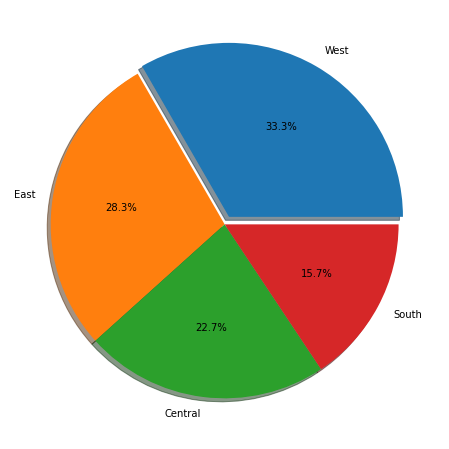

In [24]:
# Plot a Pie Chart for Region-wise Distribution of Sales
plt.figure(figsize=(8,8))
explode = (0.05,0,0,0)
plt.pie(Region_count, labels=Region_count.index, autopct="%0.1f%%", explode= explode, shadow=True)
plt.show()

**The ' West ' region has the highest share, accounting for 33.3% of the total sales distribution across all regions.**

In [25]:
Top_10_City_count = df['City'].value_counts()[:10]
Top_10_City_count

New York City    192
Los Angeles      154
Philadelphia     111
San Francisco    102
Seattle           97
Houston           81
Chicago           68
Columbus          48
San Diego         46
Detroit           28
Name: City, dtype: int64

In [26]:
Top_10_City_count.index

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Detroit'],
      dtype='object')

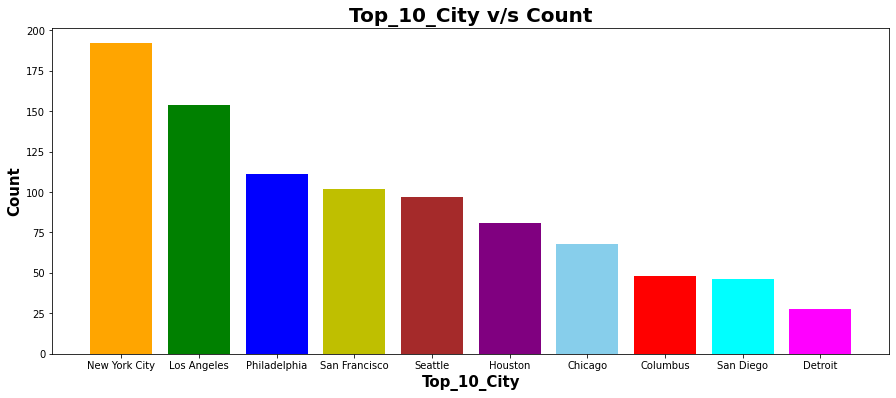

In [27]:
# Plot a Bar graph.
plt.figure(figsize=(15,6))
plt.bar(Top_10_City_count.index,Top_10_City_count,color=['Orange','g','b','y','brown','purple','skyblue','r','Cyan','magenta'])
plt.title('Top_10_City v/s Count',fontweight='bold',fontsize=20)
plt.xlabel('Top_10_City',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)
plt.show()

**' New York ' City is leading in sales count**

In [28]:
State_count = df['State'].value_counts()[:10]
State_count

California      444
New York        236
Texas           202
Pennsylvania    125
Illinois        123
Washington      114
Ohio             93
Florida          85
Virginia         52
Colorado         51
Name: State, dtype: int64

In [29]:
State_count.index

Index(['California', 'New York', 'Texas', 'Pennsylvania', 'Illinois',
       'Washington', 'Ohio', 'Florida', 'Virginia', 'Colorado'],
      dtype='object')

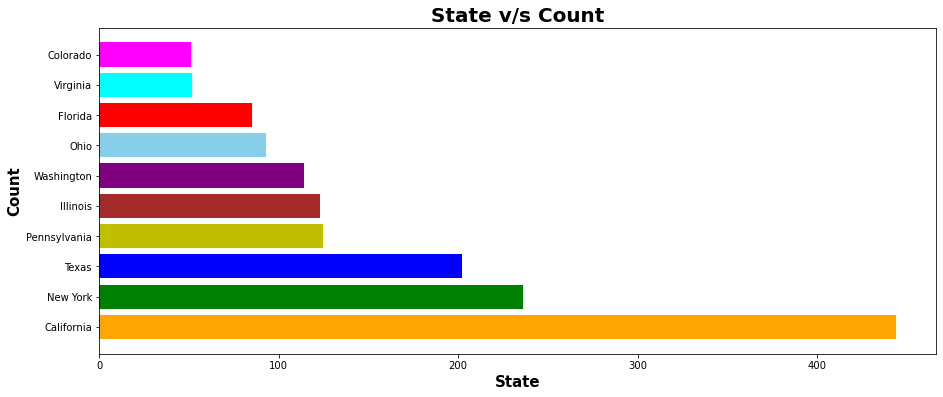

In [30]:
# Plot a Horrizontal Bar graph.
plt.figure(figsize=(15,6))
plt.barh(State_count.index,State_count,color=['Orange','g','b','y','brown','purple','skyblue','r','Cyan','magenta'])
plt.title('State v/s Count',fontweight='bold',fontsize=20)
plt.xlabel('State',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)
plt.show()

**' California state ' is leading in sales count**

In [31]:
Category_count = df['Category'].value_counts()
Category_count

Furniture    2121
Name: Category, dtype: int64

In [32]:
Sub_Category_count = df['Sub-Category'].value_counts()
Sub_Category_count

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [33]:
Sub_Category_count.index

Index(['Furnishings', 'Chairs', 'Tables', 'Bookcases'], dtype='object')

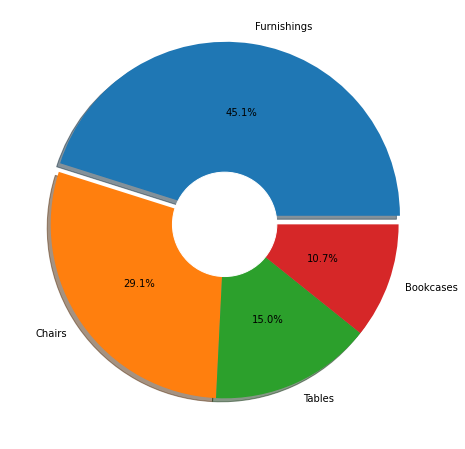

In [34]:
# Plot a Donut Chart for Sub_Category.
plt.figure(figsize=(8,8))
explode = (0.05, 0, 0, 0)
plt.pie(Sub_Category_count,labels=Sub_Category_count.index, shadow=True, autopct ='%0.1f%%', explode=explode)
circle = plt.Circle( (0,0), 0.3, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

**The ' Furnishings ' sub-category holds the highest share in sales, accounting for 45.1% of the total.**

In [35]:
Ship_Mode_count = df['Ship Mode'].value_counts()
Ship_Mode_count

Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: Ship Mode, dtype: int64

In [36]:
# Define Dependant and independant variables.
X = df.drop(columns=['Sales','Order Date','Ship Date','Postal Code','Category', 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID'])# Independant variables
y = df['Sales'] # dependant variables

In [37]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [38]:
X_train

,Ship Mode,Segment,Country,City,State,Region,Sub-Category,Product Name,Quantity,Discount,Profit,Order_year,Order_month,Order_day_of_week,Ship_year,Ship_month,Ship_day_of_week
1533,Second Class,Consumer,United States,San Jose,California,West,Chairs,Harbour Creations 67200 Series Stacking Chairs,2,0.20,9.9652,2016,11,5,2016,11,0
648,Standard Class,Consumer,United States,Chattanooga,Tennessee,South,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",5,0.20,3.3440,2016,5,3,2016,5,0
267,Same Day,Consumer,United States,Fort Worth,Texas,Central,Chairs,Office Star Flex Back Scooter Chair with White...,5,0.30,-88.7840,2016,5,3,2016,5,3
1924,Standard Class,Consumer,United States,Los Angeles,California,West,Furnishings,Nu-Dell Oak Frame,7,0.00,23.9232,2015,10,1,2015,10,5
223,Standard Class,Home Office,United States,New York City,New York,East,Furnishings,Eldon Advantage Foldable Chair Mats for Low Pi...,2,0.00,22.7640,2015,4,5,2015,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Standard Class,Home Office,United States,Colorado Springs,Colorado,West,Chairs,SAFCO Arco Folding Chair,6,0.20,149.1480,2016,4,6,2016,4,3
1731,Standard Class,Consumer,United States,San Diego,California,West,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,3,0.15,-30.1470,2015,11,0,2015,11,4
763,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Chairs,"Global Wood Trimmed Manager's Task Chair, Khaki",2,0.30,-30.9332,2017,11,0,2017,11,5
835,Standard Class,Consumer,United States,Lakewood,California,West,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",3,0.15,24.2352,2016,4,6,2016,4,3


In [40]:
X_train.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit',
       'Order_year', 'Order_month', 'Order_day_of_week', 'Ship_year',
       'Ship_month', 'Ship_day_of_week'],
      dtype='object')

In [41]:
# Sepetate Numeric and categorical Features
numeric_features = ['Quantity','Discount', 'Profit','Order_year', 'Order_month', 'Order_day_of_week', 
                    'Ship_year','Ship_month', 'Ship_day_of_week']
categorical_features = ['Ship Mode','Segment','Sub-Category','Product Name','Country', 'City', 'State', 'Region',]

In [42]:
# Scalling
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(-1, 1)))])

In [43]:
# Encoding
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [44]:
# Data Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [45]:
# Models
reg_model = LinearRegression()
dt_model  = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 2 )
rf_model  = RandomForestRegressor(n_estimators=200, max_depth = 20, min_samples_leaf = 1 )

## Create Pipeline

In [46]:
set_config(display='diagram')

In [47]:
# Create Pipeline for Linear Regression
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Linear Regression', reg_model),
])

In [48]:
# Create Pipeline for Decission Tree Model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Decission Tree Model', dt_model)
])

In [49]:
# Create Pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Random Forest Regressor', rf_model)
])

In [50]:
# Fit Linear Regression Model
reg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Quantity', 'Discount',
                                                   'Profit', 'Order_year',
                                                   'Order_month',
                                                   'Order_day_of_week',
                                                   'Ship_year', 'Ship_month',
                                                   'Ship_day_of_week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Sub-Category',
                                                   'Product Name', 'Country',
                                                   'City', 'State',
                                                   'Region'])])),
                ('Linear Regression', LinearRegression())])

In [51]:
# Fit Decission Tree Model
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Quantity', 'Discount',
                                                   'Profit', 'Order_year',
                                                   'Order_month',
                                                   'Order_day_of_week',
                                                   'Ship_year', 'Ship_month',
                                                   'Ship_day_of_week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Sub-Category',
                                                   'Product Name', 'Country',
                                                   'City', 'State',
                                                   'Region'])])),
                ('Decission Tree Model',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=2))])

In [52]:
# Fit Random Forest Model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Quantity', 'Discount',
                                                   'Profit', 'Order_year',
                                                   'Order_month',
                                                   'Order_day_of_week',
                                                   'Ship_year', 'Ship_month',
                                                   'Ship_day_of_week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Sub-Category',
                                                   'Product Name', 'Country',
                                                   'City', 'State',
                                                   'Region'])])),
                ('Random Forest Regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200))])

In [53]:
# Calculate predicted values for Linear Regression, Decission Tree and Random Forest.
y_pred_reg = reg_pipeline.predict(X_test)
y_pred_dt  = dt_pipeline.predict(X_test)
y_pred_rf  = rf_pipeline.predict(X_test)

In [54]:
# Calculate MSE for Linear Regression, Decission Tree and Random Forest.
mse_reg = mean_squared_error(y_test, y_pred_reg)
mse_dt  = mean_squared_error(y_test, y_pred_dt)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error for Regression Model : ', mse_reg)
print('Mean Squared Error for Decission Tree Model : ', mse_dt)
print('Mean Squared Error for Random Forest Model : ', mse_rf)

Mean Squared Error for Regression Model :  87152.71661596301
Mean Squared Error for Decission Tree Model :  85158.03167012674
Mean Squared Error for Random Forest Model :  58608.04646649296


**Mean Squared Error for ' Random Forest Model ' is low, Means it will perform better.**

In [55]:
# Calculate R-squared score for Linear Regression, Decission Tree and Random Forest
r2_reg = r2_score(y_test, y_pred_reg)
r2_dt  = r2_score(y_test, y_pred_dt)
r2_rf  = r2_score(y_test, y_pred_rf)
print('R-squared Score for regression Model :', r2_reg)
print('R-squared Score for Decission Tree Model :', r2_dt)
print('R-squared Score for Random Forest Modell :', r2_rf)

R-squared Score for regression Model : 0.6319617935820043
R-squared Score for Decission Tree Model : 0.6403851715137496
R-squared Score for Random Forest Modell : 0.7525034084911149


**R-squared score for ' Random Forest Model ' is High, means it will perform better.**

## Cross Validation

In [56]:
# Calculate cross validation score for Linear Regression model.
cv_score_reg = cross_val_score(reg_pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross Valiadtion Score for Linear Regression Model :" )
for fold, score in enumerate(cv_score_reg,start=1):
    print("Fold",fold,"R_squared_score ",round(score,2) )
    
Mean_reg_score = cv_score_reg.mean()
print("Mean Cross Valiadtion Score for Linear Regression Model :", round(Mean_reg_score,2))

Cross Valiadtion Score for Linear Regression Model :
Fold 1 R_squared_score  0.69
Fold 2 R_squared_score  0.63
Fold 3 R_squared_score  0.67
Fold 4 R_squared_score  0.52
Fold 5 R_squared_score  0.65
Mean Cross Valiadtion Score for Linear Regression Model : 0.63


In [57]:
# Calculate Cross Validation Score for Decission Tree model
cv_score_dt = cross_val_score(dt_pipeline, X_train, y_train, cv = 5, scoring='r2')
print("Cross Validation Score for Decission Tree model :")
for fold,score in enumerate(cv_score_dt,start=1):
    print("Fold",fold,"R_squared_score", round(score,2))

Mean_dt_score = cv_score_dt.mean()
print("Mean Cross Validation Score for Decission Tree Model :", round(Mean_dt_score,2))

Cross Validation Score for Decission Tree model :
Fold 1 R_squared_score 0.73
Fold 2 R_squared_score 0.53
Fold 3 R_squared_score 0.61
Fold 4 R_squared_score 0.5
Fold 5 R_squared_score 0.4
Mean Cross Validation Score for Decission Tree Model : 0.55


In [59]:
# Calculate Cross Validation Score for Random Forest model
cv_score_rf = cross_val_score(rf_pipeline, X_train, y_train, cv = 5, scoring='r2')
print("Cross Validation Score for Random Forest Model :")
for fold,score in enumerate(cv_score_rf,start=1):
    print("Fold",fold,"R_squared_score", round(score,2))

Mean_rf_score = cv_score_rf.mean()
print("Mean Cross Validation Score for Random Forest Model :", round(Mean_rf_score,2))

Cross Validation Score for Random Forest Model :
Fold 1 R_squared_score 0.77
Fold 2 R_squared_score 0.77
Fold 3 R_squared_score 0.72
Fold 4 R_squared_score 0.78
Fold 5 R_squared_score 0.78
Mean Cross Validation Score for Random Forest Model : 0.76


**The ' Random Forest Model ' achieved highest cross-validation score of 76%, making it a suitable choice for final model selection and hyperparameter tuning.**

## Hyperparameter Tuning

In [60]:
# Define the hyperparameters and their possible values to search
param_grid = {
    'Random Forest Regressor__n_estimators': [100, 200, 300],
    'Random Forest Regressor__max_depth': [None, 10, 20, 30],
    'Random Forest Regressor__min_samples_split': [2, 5, 10],
    'Random Forest Regressor__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object.
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [61]:
# Fit the grid search on the training dataset.
final_rf_model = grid_search.fit(X_train, y_train)
final_rf_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Quantity',
                                                                          'Discount',
                                                                          'Profit',
                                                                          'Order_year',
                                                                          'Order_month',
                                                                          'Order_day_of_week',
                                                                          'Ship_year',
                                                                          'Ship_month',
                                                                          'Ship_day_of_week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Ship '
                                                                          'Mode',
                                                                          'Segment',
                                                                          'Sub-Category',
                                                                          'Product '
                                                                          'Name',
                                                                          'Country',...
                                                                          'State',
                                                                          'Region'])])),
                                       ('Random Forest Regressor',
                                        RandomForestRegressor(max_depth=20,
                                                              n_estimators=200))]),
             param_grid={'Random Forest Regressor__max_depth': [None, 10, 20,
                                                                30],
                         'Random Forest Regressor__min_samples_leaf': [1, 2, 4],
                         'Random Forest Regressor__min_samples_split': [2, 5,
                                                                        10],
                         'Random Forest Regressor__n_estimators': [100, 200,
                                                                   300]},
             scoring='neg_mean_squared_error')

In [62]:
# Print the best hyperparameters and the corresponding R-squared score
print("Best Hyperparameters:", final_rf_model.best_params_)
print("Best Score (R-squared):", final_rf_model.best_score_)

Best Hyperparameters: {'Random Forest Regressor__max_depth': 30, 'Random Forest Regressor__min_samples_leaf': 1, 'Random Forest Regressor__min_samples_split': 2, 'Random Forest Regressor__n_estimators': 300}
Best Score (R-squared): -59808.816546351896


In [66]:
# Prediction 
y_pred = final_rf_model.predict(X_test)

## Save the Model

In [69]:
pickle.dump(final_rf_model,open('Furniture Sales Forecasting Model.pkl','wb'))

## Conclusion:
**Model Performance:** Three models were trained on the data – the Linear Regression Model, Decission Tree Model and Random Forest Regression Model. Their performance scores were as follows:

         Linear Regression Model Score: 63 %
         Decission Tree Model Score: 55 %
         Random Forest Model Score: 76 %
      
**Cross-Validation:** All the Models underwent cross-validation, assessing its consistency across different data subsets. The Mean  Cross-Validation Score for Random Forest Model is 76%. This underscores the model's robustness and its capacity to generalize effectively to new data.

**Sales Trends:**
   
**1) Yearly Sales:** The sales trend over the years indicates a consistent increase, suggesting a growing demand or an expanding market presence.

**2) Monthly Sales:** Certain months show higher sales, which may indicate seasonality. For instance, sales may peak during holiday seasons or specific times of the year.

**Key Influencing Factors:**

**1) Quantity and Discount:** Sales are positively correlated with the quantity sold, while discounts appear to have a mixed effect. High discounts might increase sales volume, but they could also reduce profit margins.

**2) Profit Correlation:** There's a positive correlation between sales and profit, but the relationship is not linear due to the impact of discounts and other factors.


**The Random Forest Regression Model is a suitable choice for predicting the output, based on the provided features. It has demonstrated excellent performance, generalization capabilities and potential for further improvement through hyperparameter tuning.**

## Recommendations:

**Inventory Management:** Based on sales forecasts, inventory should be adjusted to meet expected demand, particularly during peak months.

**Promotion Strategies:** Optimize discount strategies by analyzing past sales data to strike a balance between increasing sales and maintaining healthy profit margins.